In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
df = pd.read_csv('./googleplaystore.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
orig_len = len(df)
df = df[df['Rating'].notna()]
reduced_rating = len(df)
print('length of dataset after reducing ratings:', orig_len, '------', reduced_rating)
df = df[df['Price'].notna()]
reduced_price = len(df)
print('length of dataset after reducing prices:', reduced_rating, '------', reduced_price)
df = df[df['Category'].notna()]
Category = len(df)
print('length of dataset after reducing Category:', reduced_price, '------', Category)
df = df[df['Genres'].notna()]
Genres = len(df)
print('length of dataset after reducing Genres:', Category, '------', Genres)
df = df[df['Content Rating'].notna()]
Content_Rating = len(df)
print('length of dataset after reducing Content Rating:', Genres, '------', Content_Rating)
df = df[df['Size'].notna()]
Size = len(df)
print('length of dataset after reducing Size:', Content_Rating, '------', Size)
df = df[df['Type'].notna()]
Type = len(df)
print('length of dataset after reducing Type:', Size, '------', Type)

length of dataset after reducing ratings: 10841 ------ 9367
length of dataset after reducing prices: 9367 ------ 9367
length of dataset after reducing Category: 9367 ------ 9367
length of dataset after reducing Genres: 9367 ------ 9367
length of dataset after reducing Content Rating: 9367 ------ 9366
length of dataset after reducing Size: 9366 ------ 9366
length of dataset after reducing Type: 9366 ------ 9366


In [5]:
for column in df.columns:
    print( column, '-------', type(df[column][0]), '-------', df[column][0])

App ------- <class 'str'> ------- Photo Editor & Candy Camera & Grid & ScrapBook
Category ------- <class 'str'> ------- ART_AND_DESIGN
Rating ------- <class 'numpy.float64'> ------- 4.1
Reviews ------- <class 'str'> ------- 159
Size ------- <class 'str'> ------- 19M
Installs ------- <class 'str'> ------- 10,000+
Type ------- <class 'str'> ------- Free
Price ------- <class 'str'> ------- 0
Content Rating ------- <class 'str'> ------- Everyone
Genres ------- <class 'str'> ------- Art & Design
Last Updated ------- <class 'str'> ------- January 7, 2018
Current Ver ------- <class 'str'> ------- 1.0.0
Android Ver ------- <class 'str'> ------- 4.0.3 and up


In [6]:
for col in df.columns:
    a = df[col]
    s = []
    for i in a:
        if type(i) not in s:
            s.append(type(i))
    print(col, '-----', len(s), '------>', s)

App ----- 1 ------> [<class 'str'>]
Category ----- 1 ------> [<class 'str'>]
Rating ----- 1 ------> [<class 'float'>]
Reviews ----- 1 ------> [<class 'str'>]
Size ----- 1 ------> [<class 'str'>]
Installs ----- 1 ------> [<class 'str'>]
Type ----- 1 ------> [<class 'str'>]
Price ----- 1 ------> [<class 'str'>]
Content Rating ----- 1 ------> [<class 'str'>]
Genres ----- 1 ------> [<class 'str'>]
Last Updated ----- 1 ------> [<class 'str'>]
Current Ver ----- 2 ------> [<class 'str'>, <class 'float'>]
Android Ver ----- 2 ------> [<class 'str'>, <class 'float'>]


In [7]:
df['Type'] = df['Type'].astype(str)
df['Content Rating'] = df['Content Rating'].astype(str)
df['Current Ver'] = df['Current Ver'].astype(str)
df['Android Ver'] = df['Android Ver'].astype(str)

In [21]:
for column in df.columns:
    print ("number of unique values in column {}:".format(column), len(np.unique(np.array(df[column]))))

number of unique values in column App: 8196
number of unique values in column Category: 33
number of unique values in column Rating: 39
number of unique values in column Reviews: 5992
number of unique values in column Size: 414
number of unique values in column Installs: 19
number of unique values in column Type: 2
number of unique values in column Price: 73
number of unique values in column Content Rating: 6
number of unique values in column Genres: 115
number of unique values in column Last Updated: 1300
number of unique values in column Current Ver: 2639
number of unique values in column Android Ver: 32


In [9]:
print('The length of this dataframe is:', len(df))
df = pd.DataFrame.drop_duplicates(df)
print('The length of this reduced dataframe is:', len(df))

The length of this dataframe is: 9366
The length of this reduced dataframe is: 8892


In [10]:
clean_df = pd.DataFrame()

clean_df['App'] = df['App']
clean_df['Category'] = df['Category']
clean_df['Size'] = df['Size']
clean_df['Type'] = df['Type'] # need to delete the NAN and Free the 0 parts
clean_df['Content Rating'] = df['Content Rating']
clean_df['Genres'] = df['Genres']
clean_df['Rating'] = df['Rating']

In [11]:
clean_df.head()

,App,Category,Size,Type,Content Rating,Genres,Rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,19M,Free,Everyone,Art & Design,4.1
1,Coloring book moana,ART_AND_DESIGN,14M,Free,Everyone,Art & Design;Pretend Play,3.9
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,8.7M,Free,Everyone,Art & Design,4.7
3,Sketch - Draw & Paint,ART_AND_DESIGN,25M,Free,Teen,Art & Design,4.5
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,2.8M,Free,Everyone,Art & Design;Creativity,4.3


In [20]:
def digitize_price(column):

    list = []
    for ind, val in enumerate(column):
        if val[0] == "$":
            list.append(float(val[1:]))
        else:
            list.append(float(val))
        
    arr = np.array(list)
    return pd.Series(arr)
    

def categorize(column):
    dict = {}
    key = 1
    for i in np.unique(column):
        if i not in dict:
            dict[i] = key
            key+=1
    return dict


In [13]:
category_dict = categorize(clean_df['Category'])
clean_df = clean_df.replace({"Category": category_dict})

Size_dict = categorize(clean_df['Size'])
clean_df = clean_df.replace({"Size": Size_dict})

Type_dict = categorize(clean_df['Type'])
clean_df = clean_df.replace({"Type": Type_dict})

Content_Rating_dict = categorize(clean_df['Content Rating'])
clean_df = clean_df.replace({"Content Rating": Content_Rating_dict})

Genres_dict = categorize(clean_df['Genres'])
clean_df = clean_df.replace({"Genres": Genres_dict})

price_col = digitize_price(df['Price'])
clean_df['Price'] = price_col


In [16]:
for col in clean_df.columns:
    print('datatype of {}: '.format(col), clean_df[col].dtype)

datatype of App:  object
datatype of Category:  int64
datatype of Size:  int64
datatype of Type:  int64
datatype of Content Rating:  int64
datatype of Genres:  int64
datatype of Rating:  float64
datatype of Price:  float64


In [23]:
clean_df.head()

,App,Category,Size,Type,Content Rating,Genres,Rating,Price
0,Photo Editor & Candy Camera & Grid & ScrapBook,1,49,1,2,10,4.1,0.0
1,Coloring book moana,1,26,1,2,12,3.9,0.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",1,335,1,2,10,4.7,0.0
3,Sketch - Draw & Paint,1,89,1,5,10,4.5,0.0
4,Pixel Draw - Number Art Coloring Book,1,58,1,2,11,4.3,0.0


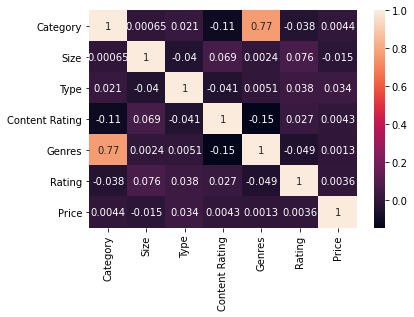

In [15]:
new_frame = clean_df[clean_df.columns[1:]]
correlation_mat = new_frame.corr()
sns.heatmap(correlation_mat, annot=True)
plt.show()